### 10 x API CALLS

In [1]:
import pandas as pd
import numpy as np

### Create DataFrames from CSVs

In [2]:
df_insurance3 = pd.read_csv('insurance3r2.csv')
df_insurance3

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


### Create New Columns (Transform/ Calculate)

In [3]:
""" EXPENSES CALCULATE FOR INFLATIONS- original dataset is from Machine Learning with R by Brett Lantz which was published in 2013"""
#Inflation Rate Formula = ((B-A)/A) x 100
# https://mint.intuit.com/blog/planning/inflation-rate-formula/
# average inflation rate between JAN 2013 and SEP 2022 was 0.2889009838364647 or 28%
#https://www.bls.gov/data/inflation_calculator.htm
inflation = []
for charg in df_insurance3['charges']:
    inflation.append(charg * 0.2889 + charg)
df_insurance3.insert(8, 'charges 2022 inflation adj', inflation)#add a new inflation expenses column


#RENAME CHARGES COLUMN
df_insurance3.rename(columns = {'charges':'2013 charges'}, inplace = True)#renamed the charges column to charges 2013

#CHANGE REGIONS BACK TO NOMINAL instead of quantitaive ints
df_insurance3['region'] = df_insurance3['region'].map({0:'northeast', 1:'northwest',2:'southeast',3:'southwest'})#changed regions back to nominal strings for readability

df_insurance3

# # #DROP SMOKERS RECORDS AS OUTLIERS: ######### I haven't Decided to keep the smokers and charge them more
# df_insurance3.drop(df_insurance3[df_insurance3['smoker'] == 1].index, inplace = True)
df_insurance3['smoker']=  df_insurance3['smoker'].astype(bool) ## Make it a Boolean Value

#DROP ORIGINAL CHARGES 2013, and sex COLUMN:
del df_insurance3['2013 charges']

del df_insurance3['sex']

del df_insurance3['insuranceclaim']


#PRIMARY CARE COLUMN
""" PRIMARY CARE expense column -The percentage of US healthcare expense in 2022 on primary and preventative care was 4.88 in 2017 and and 4.67 in 2019 a difference of
0.21 over a three year period. divided by 3 yields the decrease over one year 0.07 per year decrease, therefore from 2019 to 2022 the percent
expense on primary care should be 4.67(2019) minus 0.21 assuming the trend continues = 4.46% expenditure on primary care in 2022 """
#https://revcycleintelligence.com/news/primary-care-spending-declining-despite-well-known-health-benefits#:
# ~:text=Under%20the%20broader%20definition%2C%20primary,from%207.8%20percent%20in%202017.
pc_expense = []
for exp in df_insurance3['charges 2022 inflation adj']:
    pc_expense.append(exp * 0.0446)
df_insurance3.insert(7,"Primary Care expenses 2022",pc_expense)
df_insurance3

#PRESCRIPTION COLUMN:
"""PERSCRIPTION DRUGS expenditure accounted for 6.0% of the US healthcare budget in 2022, """
#https://www.gao.gov/prescription-drug-spending
pr_expense = []
for exp in df_insurance3['charges 2022 inflation adj']:
    pr_expense.append(exp * 0.06)
df_insurance3.insert(8,"Prescription expenses 2022",pr_expense)
df_insurance3

#PREVENTATIVE CARE COLUMN:
"""US expense on Preventaive Healthcare was 3.7% in 2000 to 2.9% in 2018.
which would be 3.7 - 2.9 = 0.8 decrease over 18years or 0.8 / 18 = 0.044 decrease per year so in 2022 that would be 3.7(2000) + (0.044 * 2) = 3.789%"""
#https://www.healthsystemtracker.org/chart-collection/what-do-we-know-about-spending-related-to-public-health-in-the-u-s-and-comparable-countries/
pvc_expense = []
for exp in df_insurance3['charges 2022 inflation adj']:
    pvc_expense.append(exp * 0.03789)
df_insurance3.insert(9,"Preventative care expenses 2022",pvc_expense)
df_insurance3

# #TOTAL PPP EXPENSES
"""if you add Primary, Prescription, and Preventative care expenditure percents together you get
 0.0446 + 0.06 + 0.03789 = 0.14249 or 14.25% expenditure on PPP care in 2022"""
ppp_expense = []
for exp in df_insurance3['charges 2022 inflation adj']:
    ppp_expense.append(exp * 0.14249)
df_insurance3.insert(10,"Total 2022 PPP expenses",ppp_expense)
df_insurance3

# INSERT FORWARDS TOTAL CURRENT PPP PRICE
fw_expense = []
for exp in df_insurance3['Total 2022 PPP expenses']:
    fw_expense.append(exp - 149*12)
df_insurance3.insert(11,"Save/Loss Forward",fw_expense)
df_insurance3

pd.options.mode.chained_assignment = None  # default='warn'---The warnings slowed down my code process, so this speeds it up.
df_insurance3

,age,bmi,steps,children,smoker,region,charges 2022 inflation adj,Primary Care expenses 2022,Prescription expenses 2022,Preventative care expenses 2022,Total 2022 PPP expenses,Save/Loss Forward
0,19,27.900,3009,0,True,southwest,21762.978544,970.628843,1305.778713,824.599257,3101.006813,1313.006813
1,18,33.770,3008,1,False,southeast,2224.064359,99.193270,133.443862,84.269799,316.906931,-1471.093069
2,28,33.000,3009,3,False,southeast,5734.911572,255.777056,344.094694,217.295799,817.167550,-970.832450
3,33,22.705,10009,0,False,northwest,28335.784169,1263.775974,1700.147050,1073.642862,4037.565886,2249.565886
4,32,28.880,8010,0,False,northwest,4983.989667,222.285939,299.039380,188.843368,710.168688,-1077.831312
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,4008,3,False,northwest,13663.046704,609.371883,819.782802,517.692840,1946.847525,158.847525
1334,18,31.920,3003,0,False,northeast,2843.288653,126.810674,170.597319,107.732207,405.140200,-1382.859800
1335,18,36.850,3008,0,False,southeast,2100.692398,93.690881,126.041544,79.595235,299.327660,-1488.672340
1336,21,25.800,8009,0,False,southwest,2588.040311,115.426598,155.282419,98.060847,368.769864,-1419.230136


### CALCULATE SAVINGS PER CAPITA WITH NEW PROPOSED PRICES

In [4]:
# ###############"""PROPOSED AGE BRACKET PRICING AND AGE BRACKET COLUMNS"""#######################

df_insurance3['Age Category'] = ''
df_insurance3['BMI Category'] = ''

for row in range(len(df_insurance3['age'])):
    if df_insurance3['age'][row] <= 18:
        df_insurance3['Age Category'][row] = '18 or younger'
    elif df_insurance3['age'][row] <= 35:
        df_insurance3['Age Category'][row] = '19 - 35'
    elif df_insurance3['age'][row] <= 50:
        df_insurance3['Age Category'][row] = '36 - 50'
    else:
        df_insurance3['Age Category'][row] = '51+'

for row in range(len(df_insurance3['bmi'])):
    if df_insurance3['bmi'][row] <= 25:
        df_insurance3['BMI Category'][row] = '<25'
    elif df_insurance3['bmi'][row] <= 35:
        df_insurance3['BMI Category'][row] = '26 - 35'
    else:
        df_insurance3['BMI Category'][row] = '36+'

##### NEXT PART######
df_insurance3['proposed_price'] = ''
age_base = 1
bmi_multiplier = 1
smoker_multiplier = 2

for row in range(len(df_insurance3['age'])):
    if df_insurance3['Age Category'][row] == '18 or younger':
        age_base = 65
    elif df_insurance3['Age Category'][row] == '19 - 35':
        age_base = 90
    elif df_insurance3['Age Category'][row] == '36 - 50':
        age_base = 85
    else:
        age_base = 85

    if df_insurance3['smoker'][row] == True:
        smoker_multiplier = 2.5
    else:
        smoker_multiplier = 1
    
    if df_insurance3['BMI Category'][row] == '<25':
        bmi_multiplier = 1
    elif df_insurance3['BMI Category'][row] == '26 - 35':
        bmi_multiplier = 1.25
    else:
        bmi_multiplier = 1.5
    
    df_insurance3['proposed_price'][row] = age_base * smoker_multiplier * bmi_multiplier *12

df_insurance3['benefit/cost from proposed pricing'] = df_insurance3['Total 2022 PPP expenses'] - df_insurance3['proposed_price']

# # CALCULATED BOOLEAN COLUMN OF WHO BENIFITS and WHO DOESN't FROM FORWARD CURRENT RATE
''' would the ratio of steps to charges increase or decrease, would people get more steps'''
ben_yes_no = []
ben = df_insurance3['benefit/cost from proposed pricing']
for i in ben:
    if i <= 0:
        ben_yes_no.append(False)
    else:
        ben_yes_no.append(True)
df_insurance3['Benefit from Proposed Price Yes/No'] = ben_yes_no

df_insurance3[["proposed_price", "benefit/cost from proposed pricing"]] = df_insurance3[["proposed_price", "benefit/cost from proposed pricing"]].apply(pd.to_numeric)

df_insurance3



,age,bmi,steps,children,smoker,region,charges 2022 inflation adj,Primary Care expenses 2022,Prescription expenses 2022,Preventative care expenses 2022,Total 2022 PPP expenses,Save/Loss Forward,Age Category,BMI Category,proposed_price,benefit/cost from proposed pricing,Benefit from Proposed Price Yes/No
0,19,27.900,3009,0,True,southwest,21762.978544,970.628843,1305.778713,824.599257,3101.006813,1313.006813,19 - 35,26 - 35,3375.0,-273.993187,False
1,18,33.770,3008,1,False,southeast,2224.064359,99.193270,133.443862,84.269799,316.906931,-1471.093069,18 or younger,26 - 35,975.0,-658.093069,False
2,28,33.000,3009,3,False,southeast,5734.911572,255.777056,344.094694,217.295799,817.167550,-970.832450,19 - 35,26 - 35,1350.0,-532.832450,False
3,33,22.705,10009,0,False,northwest,28335.784169,1263.775974,1700.147050,1073.642862,4037.565886,2249.565886,19 - 35,<25,1080.0,2957.565886,True
4,32,28.880,8010,0,False,northwest,4983.989667,222.285939,299.039380,188.843368,710.168688,-1077.831312,19 - 35,26 - 35,1350.0,-639.831312,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,4008,3,False,northwest,13663.046704,609.371883,819.782802,517.692840,1946.847525,158.847525,36 - 50,26 - 35,1275.0,671.847525,True
1334,18,31.920,3003,0,False,northeast,2843.288653,126.810674,170.597319,107.732207,405.140200,-1382.859800,18 or younger,26 - 35,975.0,-569.859800,False
1335,18,36.850,3008,0,False,southeast,2100.692398,93.690881,126.041544,79.595235,299.327660,-1488.672340,18 or younger,36+,1170.0,-870.672340,False
1336,21,25.800,8009,0,False,southwest,2588.040311,115.426598,155.282419,98.060847,368.769864,-1419.230136,19 - 35,26 - 35,1350.0,-981.230136,False


In [5]:
df_insurance4 = df_insurance3.groupby('Age Category').mean()
df_insurance4 = df_insurance4[['Total 2022 PPP expenses','proposed_price']].reset_index()
df_insurance4['Forward'] = 149 *12
df_insurance4 = df_insurance4.rename(columns={'Total 2022 PPP expenses':'Current','proposed_price':'Proposed'})

df_insurance4


,Age Category,Current,Proposed,Forward
0,18 or younger,1301.421843,1251.956522,1788
1,19 - 35,1856.330755,1781.198020,1788
2,36 - 50,2576.684267,1709.375000,1788
3,51+,3321.404857,1667.886236,1788


In [6]:
rev_forward = 149 * 12 * df_insurance3['proposed_price'].count()
rev_proposed = sum(df_insurance3['proposed_price'])

tax_rate = .21

data = {'Operating Margin':[.1,.2,.3,.4],'Revenue Impact':[0,0,0,0],'Net Profit Impact':[0,0,0,0]}
df_insurance5 = pd.DataFrame(data)

for i in range(4):
    df_insurance5['Revenue Impact'][i] = rev_proposed * df_insurance5['Operating Margin'][i] - rev_forward * df_insurance5['Operating Margin'][i]

    if df_insurance5['Operating Margin'][i] <= .1:
        tax_cut = .25
    elif df_insurance5['Operating Margin'][i] <= .2:
        tax_cut = .5
    elif df_insurance5['Operating Margin'][i] <= .3:
        tax_cut = .75
    else:
        tax_cut = 1

    df_insurance5['Net Profit Impact'][i] = rev_proposed * df_insurance5['Operating Margin'][i] - rev_proposed * df_insurance5['Operating Margin'][i] * (1 - tax_cut) * tax_rate - rev_forward * df_insurance5['Operating Margin'][i] * (1-tax_rate)
    
df_insurance5['NP_scale'] = abs(df_insurance5['Net Profit Impact']/df_insurance5['Revenue Impact'])
df_insurance5['Rev_scale'] = abs(df_insurance5['Revenue Impact']/df_insurance5['Net Profit Impact'])

df_insurance5



,Operating Margin,Revenue Impact,Net Profit Impact,NP_scale,Rev_scale
0,0.1,-11526.15,2849.024625,0.247179,4.045648
1,0.2,-23052.30,29607.415500,1.284358,0.778599
2,0.3,-34578.45,80275.172625,2.321538,0.430749
3,0.4,-46104.60,154852.296000,3.358717,0.297733


In [7]:
pricing_type = ['Forward','Proposed']
age_cat = ['18 or younger','19 - 35','36 - 50','51+']
bmi_cat = ['<25','26 - 35','36+']
smoker = [True,False]

lists = [pricing_type, age_cat, bmi_cat, smoker]

import pandas as pd
import itertools

df = pd.DataFrame(list(itertools.product(*lists)), columns=['pricing_type', 'age_cat', 'bmi_cat', 'smoker'])
df['Avg. Benefit/Loss'] = 0

for index, row in df.iterrows():
    age_category = str(row['age_cat'])
    bmi_category = str(row['bmi_cat'])
    smoker_stat = row['smoker']

    if row['pricing_type'] == 'Forward':
        df.loc[index,'Avg. Benefit/Loss'] = df_insurance3.loc[(df_insurance3['Age Category'] == age_category) & (df_insurance3['BMI Category'] == bmi_category) & (df_insurance3['smoker'] == smoker_stat),'Save/Loss Forward'].mean()
    else:
        df.loc[index,'Avg. Benefit/Loss'] = df_insurance3.loc[(df_insurance3['Age Category'] == age_category) & (df_insurance3['BMI Category'] == bmi_category) & (df_insurance3['smoker'] == smoker_stat),'benefit/cost from proposed pricing'].mean()


df.head(50)

,pricing_type,age_cat,bmi_cat,smoker,Avg. Benefit/Loss
0,Forward,18 or younger,<25,True,713.434187
1,Forward,18 or younger,<25,False,-1291.438128
2,Forward,18 or younger,26 - 35,True,2912.781659
3,Forward,18 or younger,26 - 35,False,-1149.506894
4,Forward,18 or younger,36+,True,5022.550975
5,Forward,18 or younger,36+,False,-1222.692057
6,Forward,19 - 35,<25,True,1472.232778
7,Forward,19 - 35,<25,False,-832.190821
8,Forward,19 - 35,26 - 35,True,3216.971211
9,Forward,19 - 35,26 - 35,False,-869.715727


<AxesSubplot:xlabel='Order age', ylabel='Order bmi'>

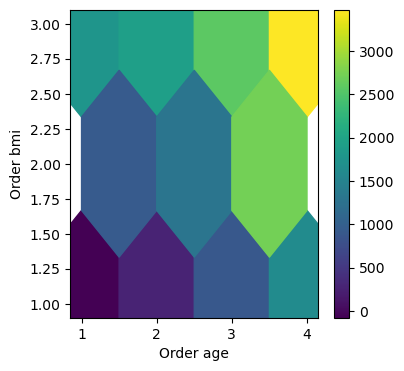

In [8]:
import altair as alt
from vega_datasets import data

# source = df

order = []
for i in df['age_cat']:
    if i == "18 or younger":
        order.append(1)	
    elif i == '19 - 35':
        order.append(2)	
    elif i == '36 - 50':
        order.append(3)	
    else:
        order.append(4)	
df.insert(2,'Order age',order)
df
B_order = []
for i in df['bmi_cat']:
    if i == "<25":
        B_order.append(1)	
    elif i == '26 - 35':
        B_order.append(2)	
    elif i == '36+':
        B_order.append(3)	
   
df.insert(4,'Order bmi',B_order)
source = df

# # Size of the hexbins
# size = 50
# # Count of distinct x features
# xFeaturesCount = 4
# # Count of distinct y features
# yFeaturesCount = 3
# # Name of the x field
# xField = 'Order age'
# # Name of the y field
# yField = 'Order bmi'

# # the shape of a hexagon
# hexagon = "M0,-2.3094010768L2,-1.1547005384 2,1.1547005384 0,2.3094010768 -2,1.1547005384 -2,-1.1547005384Z"

# alt.Chart(source).mark_point(size=size**2, shape=hexagon).encode(
#     x=alt.X('Order age:O', axis=alt.Axis(title='age_cat',
#                                            grid=False, tickOpacity=0, domainOpacity=0)),
#     y=alt.Y('Order bmi(' + yField + '):O', axis=alt.Axis(title='bmi_cat',
#                                                    labelPadding=20, tickOpacity=0, domainOpacity=0)),
#     stroke=alt.value('black'),
#     strokeWidth=alt.value(0.2),
#     fill=alt.Color('Avg. Benefit/Loss:Q', scale=alt.Scale(scheme='darkblue')),
#     # tooltip=['Order age(' + xField + '):O', 'Order bmi(' + yField + '):O', 'mean(Avg. Benefit/Loss):Q']
# ).transform_calculate(
#     # This field is required for the hexagonal X-Offset
#     # xFeaturePos='(Order bmi(' + yField + ') % 2) / 2 + Order age(' + xField + ')'
# ).properties(
#      # Exact scaling factors to make the hexbins fit
#      width=size * xFeaturesCount * 2,
#      height=size * yFeaturesCount * 1.7320508076,  # 1.7320508076 is approx. sin(60°)*2
# ).configure_view(
#     strokeWidth=0
# )


df.plot.hexbin(x= 'Order age', y='Order bmi', C='Avg. Benefit/Loss', reduce_C_function=np.mean, gridsize=3, cmap= 'viridis', figsize=(4, 4))



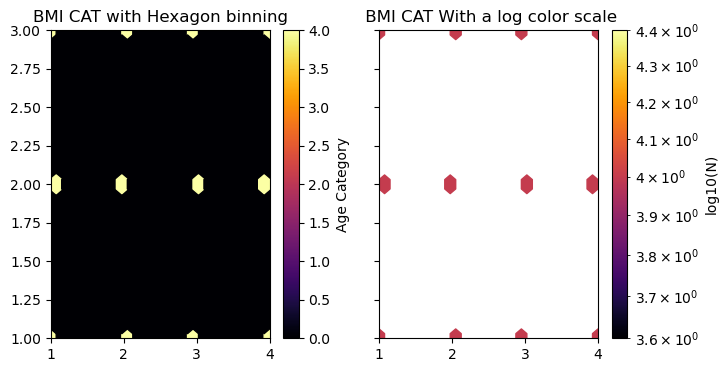

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = df['Order age']
y= df['Order bmi']
xmin = min(df['Order age'])
xmax = max(df['Order age'])
ymin = min(df['Order bmi'])
ymax = max(df['Order bmi'])

# np.random.seed(0)
# n = 100000
# x = np.random.standard_normal(n)
# y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
# xmin = x.min()
# xmax = x.max()
# ymin = y.min()
# ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=20, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("BMI CAT with Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Age Category')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=20, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(" BMI CAT With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [23]:
import altair as alt


import altair as alt


source = df

alt.Chart(source).mark_bar().encode(
    x="age_cat:N",
    y="Avg. Benefit/Loss:Q",
    # color=alt.condition(
    #     alt.datum.nonfarm_change > 0,
    #     alt.value("steelblue"),  # The positive color
    #     alt.value("orange")  # The negative color
    # )
).properties(width=600)



alt.Chart(...)

### EXPORT Refined DataFrame to CSV

In [11]:
from pathlib import Path  
filepath = Path('../Data/refined_insurance.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_insurance3.to_csv(filepath)

from pathlib import Path  
filepath = Path('../Data/refined_insurance_2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_insurance4.to_csv(filepath)

from pathlib import Path  
filepath = Path('../Data/refined_insurance_3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_insurance5.to_csv(filepath)



In [ ]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
import altair as alt

dataset = pd.read_csv("refined_insurance.csv")

# dataset.head()


d_bar = alt.Chart(dataset).mark_bar().encode(
    x=alt.X('BMI Category:O',sort=['<25','26 - 35','36+']),
    y='age:Q',
    color= alt.Color("smoker:N", type="nominal",scale=alt.Scale(range=['#800000', ' #63ba97']),legend=alt.Legend(columns=2)),
    column=alt.Colsumn('Age Category:N',header=alt.Header(titleFontSize=20,titleColor='White',labelColor='White',labelFontSize=25)),
    tooltip=alt.Tooltip('smoker:N', title='smoker:N'),
).interactive().properties(width=200,height=300).configure_axis(
    grid=False, labelFontSize=20, titleFontSize = 20
).configure_legend(labelFontSize = 15,titleFontSize=15).configure_view(
    strokeWidth=0
)